# Исследование данных о продаже компьютерных игр

 Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель исследования** — найти закономерности, которые определяют успешность компьютерной игры.

**Ход исследования**

Данные архива были взяты из файла `games.csv`. 
Перед исследованием данных необходимо прочитать файл, просмотреть информацию о нем. Для начала исправим все пропущенные значения, либо заполним их предполагаемыми, наиболее достоверными значениями, либо уберем строки, в которых такие значения невозможно подобрать, исправим типы столбцов при необходимости, уберем дубликаты. Далее проведем исселдовательский анализ данных, определим за какой период стоит рассматривать данные, чтобы в дальнейшим можно было построить прогноз на следующий год. Рассмотрим пользователей из трех регионов (NA, EU, JP), чем они различаются. 
А также проверим две гипотезы: 
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
 
Таким образом, исследование пройдёт в пять этапов:
 1. Обзор данных.
 2. Предобработка данных.
 3. Исследовательский анализ данных.
 4. Портрет пользователя каждого региона.
 5. Проверка гипотез.
 
**Описание данных** 
- `Name` — название игры 
- `Platform` — платформа 
- `Year_of_Release` — год выпуска 
- `Genre` — жанр игры 
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий) 
- `EU_sales` — продажи в Европе (миллионы проданных копий) 
- `JP_sales` — продажи в Японии (миллионы проданных копий) 
- `Other_sales` — продажи в других странах (миллионы проданных копий) 
- `Critic_Score` — оценка критиков (максимум 100) 
- `User_Score` — оценка пользователей (максимум 10) 
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. 

Данные за 2016 год могут быть неполными.

## Шаг 1. Откройте файл с данными и изучите общую информацию

Импортируем все необходимые для исследования библиотеки.

In [2]:
import pandas as pd # импортируем библиотеку для работы с данными
import matplotlib.pyplot as plt # импортируем библиотеку для работы со стилем графиков
import numpy as np # импортируем библиотеку с математическими функциями
import seaborn as sns # импортируем библиотеку для посторения графиков
from scipy import stats as st # импортируем библиотеку для статистического анализа

Откроем файл `/datasets/games.csv` и сохраним в переменную `data`.

In [3]:
data = pd.read_csv('/datasets/games.csv')

Выведем первые 5 строк датафрейма методом `head()`.

In [4]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Также посмотрим общую информацию о нем методом `info()`.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В некоторых столбцах пропущены значения (`Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating`). Необходимо будет просмотреть все такие столбцы и либо заполнить пропуски либо удалить такие строки. Стоит проверить столбцы на выбросы и удалить аномалии. Надо перевести название столбцов в нижний регистр и проверить что ни в одном названии нет пробелов в начале или в конце. Также проверим типы данных в каждом столбце, например год выхода (`Year_of_Release`) скорее всего стоит перевести к типу дата.

## Шаг 2. Подготовьте данные

### Замените названия столбцов (приведите к нижнему регистру)

Переведем название столбцов к нижнему регистру.

In [6]:
data.columns = data.columns.str.lower()

Проверим, что лишних отступов в названиях столбцов нет.

In [7]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Лишних отступов не видно, значит все хорошо.

Из общей информации по датафрейму мы уже нашли столбцы, которые надо проверить на причины появления пропусков, заменить их на логичные значения (например медиана или логичная замена NaN) либо удалить строки, где пропущенные значения невозможно востановить или предположить.

In [8]:
# Найдем количесвто пропусков по столбцам

data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Также посмотрим долю пропусков, и на основании этого приним решение о удалении либо замене пропусков. В случае если доля пропусков мала (менее 5%), для экономии времени такие пропуски можно удалить.

In [9]:
# Найдем долю пропусков по столбцам

pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,40.100000


По первой таблице видно что есть пропуски в столбцах `name` и `genre`, но их доля так мала (всего 2 пропуска), что вторая таблица их не выделяет. Такие пропуски точно можно удлаить. Также в столбце `year_of_release` менее 2% пропусков, тоже можно удалить, учитывая, что год релиза не предположить.
А вот в последних трех столбцах `critic_score`, `user_score`, `rating` более 40% пропусков и просто удалить их нельзя, потеряется много важных данных. Рассмотрим их подробней.

In [10]:
# Удалим пропуски в трех столбцах: Name, Year_of_Release, Genre

data = data.dropna(subset=['name','year_of_release','genre'])

Пропуски в `critic_score` составляют более 50%. Но оставим их пропусками, так как остается вероятность что критики либо не успели либо просто не стали оценивать некоторые игры, например это локальные игры, которые не выходили на мировой рынок, либо млишком плохие и оценивать их нет смылса. Некоторые пропуски также могли появится из-за сбоя при выгрузке данных.

### Преобразуйте данные в нужные типы

Заменим в `user_score` все неопределенный значения рейтинга на `NaN`. Если значения рейтинга неопределено, высока вероятность что пользователи еще не поставил оценку платформе.

In [11]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)

Переведем его в тип `float`, чтобы в дальнейшем исследовании было легче работать.

In [12]:
data['user_score'] = data['user_score'].astype('float')

В столбце `rating` указан возрастной рейтинг ESRB. Для 40% игр он не определен, заменим его на `No rating`, так как определить его может только специальная организация, заполнить пропуски сами мы не можем. Ассоциация могла еще не оценить некоторые игры, либо произошел сбой при выгрузке данных.

In [13]:
data['rating'] = data['rating'].fillna('RP')

Теперь проверим столбцы `year_of_release`, `genre`,	`na_sales`,	`eu_sales`,	`jp_sales`,	`other_sales`,	`critic_score`,	`user_score`,	`rating` на аномалии, дубликаты, выбросы и при необхлдимости исправим типа данных столбца.

Столбец `year_of_release` содержит в себе информацию о годе выхода игры на платформе. Столбец должен иметь тип `datetime`, а не `float64`, который имеет сейчас.

In [14]:
# Изменим тип данных столбца year_of_release

data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y')
data['year_of_release'] = data['year_of_release'].dt.year # возьмем только год выпуска, так как точная дата неизвестна

Теперь посмотрим на уникальные значения столбеца `genre`.

In [15]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Каждый жанр записан только 1 способом, неявных дубликатов нет. 

В столбце `na_sales` хранится информация о продажах в Северной Америке (миллионы проданных копий). Отсортируем датафрейм по этому столбцу, а также посмотрим на диаграмму рассеяния для выяаления выбрасов. 

In [16]:
# Сортируем по столбцу na_sales

data.sort_values(by='na_sales')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16714,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.00,0.01,0.00,NaN,NaN,RP
12497,Nazotoki Battle Tore! Densetsu no Makyuu o Fuk...,3DS,2014,Action,0.00,0.00,0.06,0.00,NaN,NaN,RP
12498,Theme Park,DS,2007,Simulation,0.00,0.02,0.03,0.00,72.0,7.6,E
12502,Super Robot Wars OG Saga Masou Kishin F: Coffi...,PS3,2014,Strategy,0.00,0.00,0.06,0.00,NaN,NaN,RP
12503,The Next BIG Thing,PC,2011,Adventure,0.00,0.05,0.00,0.01,75.0,7.9,E10+
...,...,...,...,...,...,...,...,...,...,...,...
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,RP
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,RP
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP


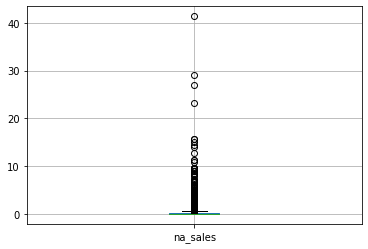

In [17]:
# Строим диаграмму размаха

data.boxplot('na_sales')
plt.show()

Из таблицы видно, что есть много игр, которые вообще не продавали в Америке, а на диаграмме показано много выбрасов, при этом нельзя вообще различить медиану. Однако выбросы убирать не будем, такое количество проданных копий вполне могло быть. Но ближе рассмотрим начало таблицы, так как медиана по диаграмме почти равна 0, а это подозрительно. Также построим диаграмму размаха с ограничением на ось "у", чтобы посмотреть на медиану и квантили.

In [18]:
# Выводим первые 10 значений отсортированного датафрейма по столбцу na_sales

data.sort_values(by='na_sales').head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16714,Winning Post 8 2016,PSV,2016,Simulation,0.0,0.00,0.01,0.00,NaN,NaN,RP
12497,Nazotoki Battle Tore! Densetsu no Makyuu o Fuk...,3DS,2014,Action,0.0,0.00,0.06,0.00,NaN,NaN,RP
12498,Theme Park,DS,2007,Simulation,0.0,0.02,0.03,0.00,72.0,7.6,E
12502,Super Robot Wars OG Saga Masou Kishin F: Coffi...,PS3,2014,Strategy,0.0,0.00,0.06,0.00,NaN,NaN,RP
12503,The Next BIG Thing,PC,2011,Adventure,0.0,0.05,0.00,0.01,75.0,7.9,E10+
4547,Neon Genesis Evangelion 2nd Impression,SAT,1997,Role-Playing,0.0,0.00,0.42,0.00,NaN,NaN,RP
4546,Dai-2-Ji Super Robot Taisen Z: Hakai-hen,PSP,2011,Strategy,0.0,0.00,0.42,0.00,NaN,NaN,RP
12505,Minna no DS Seminar: Kanpeki Eitango Ryoku,DS,2006,Misc,0.0,0.00,0.06,0.00,NaN,NaN,RP
12495,Mobile Suit Gundam 00: Gundam Meisters,PS2,2008,Action,0.0,0.00,0.06,0.00,NaN,NaN,RP
12506,Kirarin * Revolution: Minna de Odorou Furi Fur...,DS,2008,Simulation,0.0,0.00,0.06,0.00,NaN,NaN,RP


Все 10 значений равны 0 проданных игр, выглядит подозрительно.

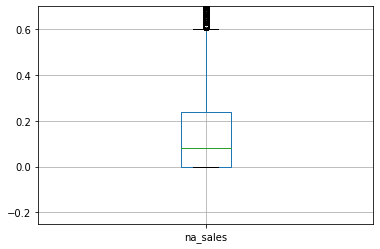

In [19]:
# Диаграмма размаха с ограничением на ось 'y'

data.boxplot('na_sales')
plt.ylim(-0.25, 0.7)
plt.show()

In [20]:
# Выведем инмормацию о столбце методом describe()

data['na_sales'].describe()

count    16444.000000
mean         0.264012
std          0.818378
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

Ящик с усами и а описание столбца показывают, что 25% - первый квартиль - всех игр представленных в датафрейме не были проданы вообще в Северной Америке, что выглядит очень подозрительно, однако исключать такую возможность нельзя. Все таки не каждая игра выходит за рамки даже определенной страны, не то что одного из рассматриваемых регионов. Посмотрим сколько игр не продавалось ишр в Северной Америке.

In [21]:
# Количество значений каждого столбца, где значение na_sales равно 0

data.loc[data['na_sales'] == 0.0].count()

name               4449
platform           4449
year_of_release    4449
genre              4449
na_sales           4449
eu_sales           4449
jp_sales           4449
other_sales        4449
critic_score        617
user_score          679
rating             4449
dtype: int64

Значений равных 0 в столбце na_sales целых 4449. Это и правда выглядит странно, но удалить столько значений нельзя, при этом остается вероятность что действительно много малоизвестных игр, которые продаются только локально, например в стране производства. Хоть у 679 из 4449 игр и есть оценки пользователей, не станем заполнять эти пропуски. Возможно в Америке продано лишь 679 людям, например на каждую игру по 1 человеку, а в столбце данные измеряются милионами копий.

Также рассмотрим столбцы `eu_sales`, `jp_sales` и `other_sales`. Скорее всего мы ожидаем видеть похожую картину, немало игры выпускаемых локально на территории страны, либо просто непопулярных в определенных регионов, так как рынок компьютерных игр огромен и далеко не все имеют мировую известность.

In [22]:
# Сортируем по столбцу eu_sales

data.sort_values(by='eu_sales')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16714,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.00,0.01,0.00,NaN,NaN,RP
12239,Bleach: Hanatareshi Yabou,PS2,2006,Role-Playing,0.00,0.00,0.07,0.00,NaN,NaN,RP
12242,Yoake Yori Ruriiro na: Brighter than Dawning Blue,PS2,2006,Adventure,0.00,0.00,0.07,0.00,NaN,NaN,RP
5887,Madden NFL 13,PSV,2012,Sports,0.28,0.00,0.00,0.02,63.0,7.3,E
5886,One Piece Unlimited Cruise SP,3DS,2011,Action,0.00,0.00,0.30,0.00,46.0,7.3,RP
...,...,...,...,...,...,...,...,...,...,...,...
19,Brain Age: Train Your Brain in Minutes a Day,DS,2005,Misc,4.74,9.20,4.16,2.04,77.0,7.9,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,RP
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


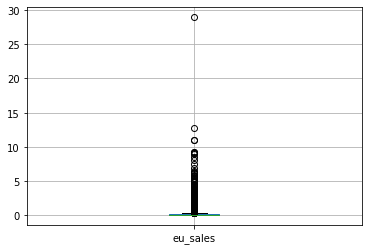

In [23]:
# Строим диаграмму размаха

data.boxplot('eu_sales')
plt.show()

Опять медиана не видна, как и сам ящик.

In [24]:
# Выводим первые 10 значений отсортированного датафрейма по столбцу eu_sales

data.sort_values(by='eu_sales').head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16714,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.0,0.01,0.00,NaN,NaN,RP
12239,Bleach: Hanatareshi Yabou,PS2,2006,Role-Playing,0.00,0.0,0.07,0.00,NaN,NaN,RP
12242,Yoake Yori Ruriiro na: Brighter than Dawning Blue,PS2,2006,Adventure,0.00,0.0,0.07,0.00,NaN,NaN,RP
5887,Madden NFL 13,PSV,2012,Sports,0.28,0.0,0.00,0.02,63.0,7.3,E
5886,One Piece Unlimited Cruise SP,3DS,2011,Action,0.00,0.0,0.30,0.00,46.0,7.3,RP
5885,Super Bomberman 5,SNES,1997,Puzzle,0.00,0.0,0.30,0.00,NaN,NaN,RP
12243,Carol Vorderman's Sudoku,PSP,2006,Puzzle,0.05,0.0,0.00,0.01,72.0,NaN,E
5882,Macross Digital Mission VF-X,PS,1997,Simulation,0.00,0.0,0.28,0.02,NaN,NaN,RP
5881,Jonas,DS,2009,Adventure,0.27,0.0,0.00,0.02,45.0,NaN,E
12245,Gundam Try Age SP,3DS,2014,Strategy,0.00,0.0,0.07,0.00,NaN,NaN,RP


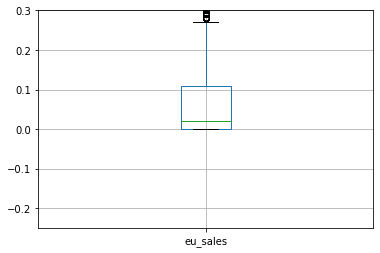

In [25]:
# Диаграмма размаха с ограничением на ось 'y'

data.boxplot('eu_sales')
plt.ylim(-0.25, 0.3)
plt.show()

In [26]:
# Выведем инмормацию о столбце методом describe()

data['eu_sales'].describe()

count    16444.000000
mean         0.145930
std          0.506716
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64

In [27]:
# Количество значений каждого столбца, где значение eu_sales равно 0

data.loc[data['eu_sales'] == 0.0].count()

name               5766
platform           5766
year_of_release    5766
genre              5766
na_sales           5766
eu_sales           5766
jp_sales           5766
other_sales        5766
critic_score       1257
user_score         1069
rating             5766
dtype: int64

Картина похожая, как и ожидалось, только 0 значений еще больше - 5766. Также есть 1069 оценненых игр, однако не станем их трогать и убирать. Вероятно, если игры и были куплены, то их купило слишком мало людей.

Теперь проверим столбец `jp_sales`, где ожидается такая же картина как и в предыдущих двух.

In [28]:
# Сортируем по столбцу jp_sales

data.sort_values(by='jp_sales')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6347,Wipeout 2,X360,2011,Misc,0.25,0.00,0.00,0.02,NaN,NaN,E10+
14099,World in Conflict: Complete Edition,PC,2009,Strategy,0.00,0.03,0.00,0.01,NaN,NaN,T
8295,Looney Tunes: Back in Action,GC,2003,Platform,0.13,0.03,0.00,0.00,64.0,5.0,E
8296,Marvel Super Hero Squad: The Infinity Gauntlet,PS3,2010,Action,0.12,0.03,0.00,0.02,54.0,NaN,E10+
8297,The Chronicles of Narnia: Prince Caspian,PS3,2008,Action,0.14,0.01,0.00,0.02,56.0,5.6,T
...,...,...,...,...,...,...,...,...,...,...,...
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,RP
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,RP


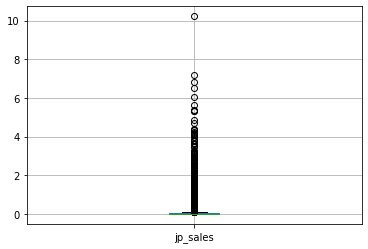

In [29]:
# Строим диаграмму размаха

data.boxplot('jp_sales')
plt.show()

Большинство значений опять же находяться почти у 0.

In [30]:
# Выводим первые 10 значений отсортированного датафрейма по столбцу jp_sales

data.sort_values(by='jp_sales').head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6347,Wipeout 2,X360,2011,Misc,0.25,0.00,0.0,0.02,NaN,NaN,E10+
14099,World in Conflict: Complete Edition,PC,2009,Strategy,0.00,0.03,0.0,0.01,NaN,NaN,T
8295,Looney Tunes: Back in Action,GC,2003,Platform,0.13,0.03,0.0,0.00,64.0,5.0,E
8296,Marvel Super Hero Squad: The Infinity Gauntlet,PS3,2010,Action,0.12,0.03,0.0,0.02,54.0,NaN,E10+
8297,The Chronicles of Narnia: Prince Caspian,PS3,2008,Action,0.14,0.01,0.0,0.02,56.0,5.6,T
8298,Tak: The Great Juju Challenge,GBA,2005,Platform,0.12,0.05,0.0,0.00,52.0,NaN,E
14098,Pro Evolution Soccer 2017,X360,2016,Sports,0.01,0.02,0.0,0.00,NaN,6.5,E
8300,SingStar Motown,PS3,2009,Misc,0.00,0.15,0.0,0.02,NaN,NaN,RP
8302,Top Spin 2,X360,2006,Sports,0.15,0.00,0.0,0.01,75.0,6.8,E
14100,Deception III: Dark Delusion,PS,1999,Role-Playing,0.02,0.01,0.0,0.00,NaN,NaN,RP


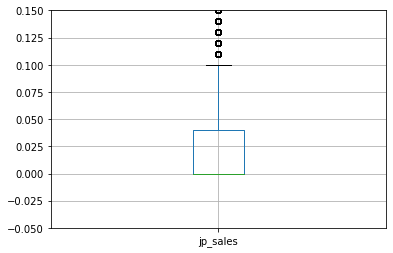

In [31]:
# Диаграмма размаха с ограничением на ось 'y'

data.boxplot('jp_sales')
plt.ylim(-0.05, 0.15)
plt.show()

In [32]:
# Выведем инмормацию о столбце методом describe()

data['jp_sales'].describe()

count    16444.000000
mean         0.078487
std          0.311100
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64

In [33]:
# Количество значений каждого столбца, где значение jp_sales равно 0

data.loc[data['jp_sales'] == 0.0].count()

name               10300
platform           10300
year_of_release    10300
genre              10300
na_sales           10300
eu_sales           10300
jp_sales           10300
other_sales        10300
critic_score        5904
user_score          5359
rating             10300
dtype: int64

Здесь и медиана равна 0, скорее всего большинство игр не доходит до Японии, либо не принимается там публикой. Хоть и половина игр из тех, что не были куплены оценена, также оставим пропуски. 

Сделаем тоже самое для столбца `other_sales`.

In [34]:
# Сортируем по столбцу other_sales

data.sort_values(by='other_sales')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16714,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.00,0.01,0.00,NaN,NaN,RP
4737,Mario no Super Picross,SNES,1995,Puzzle,0.00,0.00,0.41,0.00,NaN,NaN,RP
12238,Mayhem 3D,X360,2011,Racing,0.06,0.00,0.00,0.00,47.0,8.6,E10+
12239,Bleach: Hanatareshi Yabou,PS2,2006,Role-Playing,0.00,0.00,0.07,0.00,NaN,NaN,RP
12240,Karaoke Revolution Party,XB,2005,Misc,0.05,0.01,0.00,0.00,80.0,NaN,E10+
...,...,...,...,...,...,...,...,...,...,...,...
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M
48,Gran Turismo 4,PS2,2004,Racing,3.01,0.01,1.10,7.53,89.0,8.5,E
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E


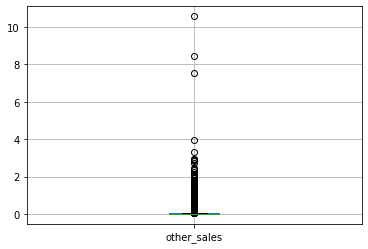

In [35]:
# Строим диаграмму размаха

data.boxplot('other_sales')
plt.show()

In [36]:
# Выводим первые 10 значений отсортированного датафрейма по столбцу other_sales

data.sort_values(by='other_sales').head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16714,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,RP
4737,Mario no Super Picross,SNES,1995,Puzzle,0.00,0.00,0.41,0.0,NaN,NaN,RP
12238,Mayhem 3D,X360,2011,Racing,0.06,0.00,0.00,0.0,47.0,8.6,E10+
12239,Bleach: Hanatareshi Yabou,PS2,2006,Role-Playing,0.00,0.00,0.07,0.0,NaN,NaN,RP
12240,Karaoke Revolution Party,XB,2005,Misc,0.05,0.01,0.00,0.0,80.0,NaN,E10+
4733,Hatsune Miku: Project Diva 2nd,PSP,2010,Misc,0.00,0.00,0.41,0.0,NaN,NaN,RP
12242,Yoake Yori Ruriiro na: Brighter than Dawning Blue,PS2,2006,Adventure,0.00,0.00,0.07,0.0,NaN,NaN,RP
12244,Pandemonium 2,PS,1997,Platform,0.04,0.02,0.00,0.0,NaN,NaN,RP
12245,Gundam Try Age SP,3DS,2014,Strategy,0.00,0.00,0.07,0.0,NaN,NaN,RP
4725,AKB1/48: Idol to Koishitara...,PSP,2010,Misc,0.00,0.00,0.41,0.0,NaN,NaN,RP


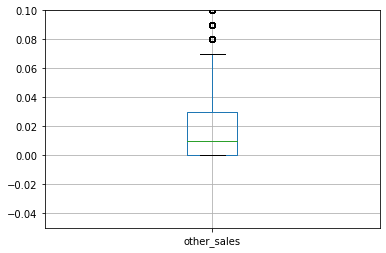

In [37]:
# Диаграмма размаха с ограничением на ось 'y'

data.boxplot('other_sales')
plt.ylim(-0.05, 0.10)
plt.show()

In [38]:
# Выведем инмормацию о столбце методом describe()

data['other_sales'].describe()

count    16444.000000
mean         0.047594
std          0.188005
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64

In [39]:
# Количество значений каждого столбца, где значение other_sales равно 0

data.loc[data['other_sales'] == 0.0].count()

name               6492
platform           6492
year_of_release    6492
genre              6492
na_sales           6492
eu_sales           6492
jp_sales           6492
other_sales        6492
critic_score       1786
user_score         1400
rating             6492
dtype: int64

Много пропусков, но их нельзя не заполнить, ни удалить. Либо исказим данные, либо потеряем важную информацию.

Перейдем к столбцу `critic_score`. Отсортируем датафрейм по этому столбцу.

In [40]:
# Сортируем по столбцу critic_score

data.sort_values(by='critic_score')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
13689,Ride to Hell,PS3,2013,Racing,0.02,0.01,0.00,0.01,13.0,1.0,M
10662,Leisure Suit Larry: Box Office Bust,PS3,2009,Adventure,0.06,0.03,0.00,0.01,17.0,1.7,M
10015,Rugby 15,PS4,2015,Sports,0.04,0.06,0.00,0.02,19.0,3.4,E
15343,Balls of Fury,Wii,2007,Sports,0.02,0.00,0.00,0.00,19.0,2.8,E10+
12131,Anubis II,Wii,2007,Platform,0.06,0.00,0.00,0.00,19.0,2.7,E
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,RP
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,RP
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,RP
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,RP


Из таблицы можо сделать вывод что оценивание критиками осуществляется по стобалльной шкале. Самая мальнекая оценка критиков это 13 пунктов, а самая высокая - 98. Выглядит вполне реалистично, всегда есть неудачные платформы и игры и наоборот, хорошо проработанные, качественные, интересные.

Посмотрим на уникальные значения столбца `rating`, чтобы убедиться что одно и тоже значение рейтинга не записано по разному, например разным регистром.

In [41]:
data['rating'].unique()

array(['E', 'RP', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC'], dtype=object)

Все значения имеют только  форму записи.

### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец

Добавим в датафрейм столбец `total_sales` с сумарными продажими по всем регионам (NA, EU, JP).

In [42]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales']

In [43]:
# Выведем первые 5 строк датафрейма

data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,39.47
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,30.38


In [44]:
# Информация о датафрейме после предобработки

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


После предобработки данных все названия колонок были переведены в нижний регистр, некоторые столбцы были переведены в удобный тип данных, а также добавлен столбцец с суммой продаж копий по трем регионам.

## Шаг 3. Проведите исследовательский анализ данных

### Посмотрите, сколько игр выпускалось в разные годы

Найдем сколько игр выпускалось в каждый год. В датафрейме информация об играх за последние 30 лет, вряд ли они все нужны для прогноза на следующий год.

In [45]:
data['year_of_release'].value_counts().sort_index(ascending=False)

2016     502
2015     606
2014     581
2013     544
2012     653
2011    1136
2010    1255
2009    1426
2008    1427
2007    1197
2006    1006
2005     939
2004     762
2003     775
2002     829
2001     482
2000     350
1999     338
1998     379
1997     289
1996     263
1995     219
1994     121
1993      60
1992      43
1991      41
1990      16
1989      17
1988      15
1987      16
1986      21
1985      14
1984      14
1983      17
1982      36
1981      46
1980       9
Name: year_of_release, dtype: int64

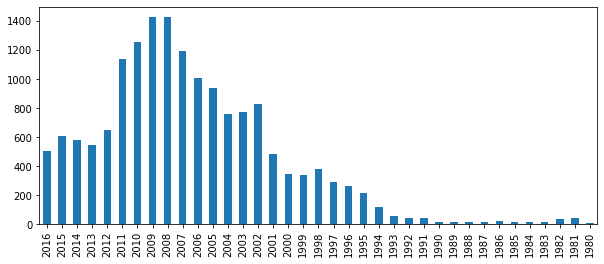

In [46]:
# Визуализируем данные, полученые выше
# За 2016 год данные могут быть неполные

plt.figure(figsize=(10, 4))
data['year_of_release'].value_counts().sort_index(ascending=False).plot(kind='bar')
plt.show()

Наибольшее число продаж приходится на 2008 и 2009 года, а самые менее продаваемые годы это ожидаемо 1980-1993, компьютеры тогда были дорогие, использовались в большинстве для работы. Между 1993 и 1994 виден относительно резкий скачок, в два раз.

### Важны ли данные за все периоды?

Данные за весь период нам не нужны, слишком большой срок за который произошло много перемен. Скорее всего возьмем 2-3 близжайших года.

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. 

Посмотрим как менялись продажи по платформам. Найдем платформы с наибольшими сумарными продажими с помощью сводной таблицы, возьмем топ-10 платформ и посмотрим на распределение по годам, чтобы понять за какой примерно срок популярность платформ меняется.

In [47]:
platform_pivot = data.pivot_table(index='platform', 
                                  values='total_sales', 
                                  aggfunc='sum'
                                 ).sort_values('total_sales', ascending=False).head(10)

In [48]:
# Выводим сводную таблицу

platform_pivot

,total_sales
platform,
PS2,1043.09
X360,876.36
Wii,813.47
PS3,796.75
DS,743.74
PS,686.89
GBA,305.27
PS4,265.79
PSP,248.77


In [49]:
# Индексы в сводной таблице записываем в список

platform_top_5 = platform_pivot.index

Создадим сводную таблицу с информацией о 5 платформах и ежегодных общих продажах по ним.

In [50]:
# Создаем сводную таблицу

stats_platform = data.query('platform in @platform_top_5'
                           ).pivot_table(index=['year_of_release', 'platform'], 
                                         values='total_sales', aggfunc='sum').round(2).reset_index()

In [51]:
# Выводим первые и последние 5 строк таблицы

stats_platform

,year_of_release,platform,total_sales
0,1985,DS,0.02
1,1988,GB,1.40
2,1989,GB,63.57
3,1990,GB,4.46
4,1991,GB,5.49
...,...,...,...
99,2015,X360,10.86
100,2016,PS3,3.23
101,2016,PS4,59.01
102,2016,Wii,0.17


Теперь построим столбчатую диаграмму, на которой посмотрим как распределяется общие продажи игр на платформах по годам.

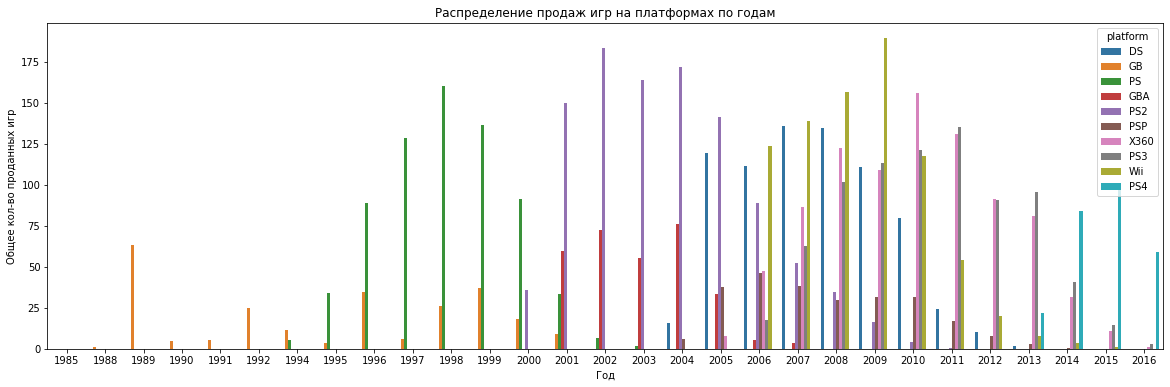

In [52]:
# Строим столбчатую диаграмму, задаем размер

plt.figure(figsize=(20, 6))
ax = sns.barplot(x='year_of_release',
            y='total_sales',
            hue="platform",
            data=stats_platform)

ax.set_title('Распределение продаж игр на платформах по годам')
ax.set(xlabel='Год', ylabel='Общее кол-во проданных игр')

plt.show()

### За какой характерный срок появляются новые и исчезают старые платформы?

На диаграмме видно, что платформы набирают и теряют популярность. В 1985 начала развиваться платформа DS, однако ее продажи были слишком малы, чтобы отобразить их на диаграмме - 0.02 млн. Далее она набирала популярность и наибольшее число продаж имела в 2007-2008 года. Между 1985 и 2008 появлялось и пропадало несколько платформ, такие как GB и PS, которые к 2002 году пропали из топ-10 совсем. В 2000 появилась платформа PS2 и следующие 5 лет была самой продаваемой. С 2006 по 2009 наибольшую больше всего продаж было у платформу Wii, которую на 1 год вменила Х360, а следующие три года с небольшим отрывом от Х360 лидировала  PS2. Однако в последние три года (2014-2016) лидирует платформа  PS4, которая появилась в топ-10 в 2013 году. Все платформы имеют срок жизни примерно  9-10 лет, далее их продажи быстро идут на спад. Единственная платформа, которая продержалась в топ-10 дольше это PS2.

### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. **Не учитывайте в работе данные за предыдущие годы.**

Для дальнейшего исследования возьмем данные из датафрейма относящиеся к 2014-2016 годам. Если брать период больше в исследовании будут неактуальные данные. Сохраним в переменной `data_21` срез данных по датафрейму.

In [53]:
data_21 = data.query('year_of_release > 2013')

In [54]:
# Выведем первые 5 строк data_21

data_21.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,12.25
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,10.65
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,RP,10.94
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,7.30
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,RP,6.70


### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Построим еще раз сводную таблицу `platform_21_pivot` по общим продажам платформ. Посмотрим платформы в по новому датафрейму.

In [55]:
platform_21_pivot = data_21.pivot_table(index='platform', 
                                        values='total_sales', 
                                        aggfunc='sum').sort_values('total_sales', ascending=False)

In [56]:
# Выводим сводную таблицу

platform_21_pivot

,total_sales
platform,
PS4,243.67
XOne,127.84
3DS,83.00
PS3,58.81
X360,43.87
WiiU,39.82
PC,25.20
PSV,20.59
Wii,4.67


In [57]:
platform_pivot.index

Index(['PS2', 'X360', 'Wii', 'PS3', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'GB'], dtype='object', name='platform')

По сравнению с топ-10 всего датафремйа, топ-10 последних 3х лет отличается. PS4 самая популярная платформа последних лет, хотя по всему периоду является одной из последних в топ-10, также появляется XOne, которая стоит на втором месте, 3DS, WiiU, PC и PSV. Из топ-10 платформ за все время, рассматриваемое в датафрейме остается только PS3, Х360, Wii и PSP.	

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

Построим ящик с усами по каждой платформе.

In [58]:
# Выведем таблицу с описанием столбца total_sales по каждой платформе

data_21.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.391509,1.122935,0.01,0.030,0.080,0.230,10.94
PC,151.0,0.166887,0.304553,0.01,0.020,0.060,0.185,2.82
PS3,219.0,0.268539,0.532896,0.01,0.030,0.090,0.285,4.40
PS4,376.0,0.648059,1.358995,0.01,0.050,0.160,0.580,12.25
PSP,13.0,0.027692,0.027735,0.01,0.010,0.020,0.020,0.09
PSV,295.0,0.069797,0.123748,0.01,0.020,0.030,0.080,1.72
Wii,11.0,0.424545,0.571601,0.01,0.035,0.170,0.695,1.84
WiiU,73.0,0.545479,1.079585,0.01,0.050,0.170,0.520,6.58
X360,111.0,0.395225,0.571941,0.01,0.060,0.160,0.460,3.88


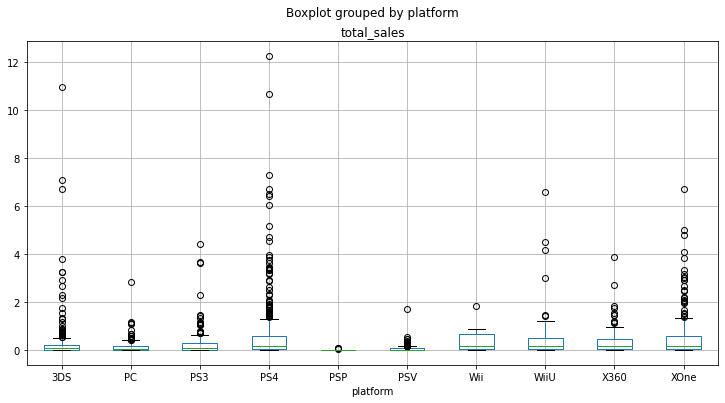

In [59]:
data_21.boxplot(column='total_sales', by='platform', figsize=(12, 6))
plt.show()

На диаграмме видно достаточно много выбросов по каждой платформе, также у 3DS и PS4 Есть самые большие выбросы, заметно больше общих продаж остальных платформ. Однако из-за этих выбросов не видно некоторых платформ совсем, таких как PSP. Построим эту же диаграмму, только с ограничениями на ось у, чтобы посмотреть на сами ящики.

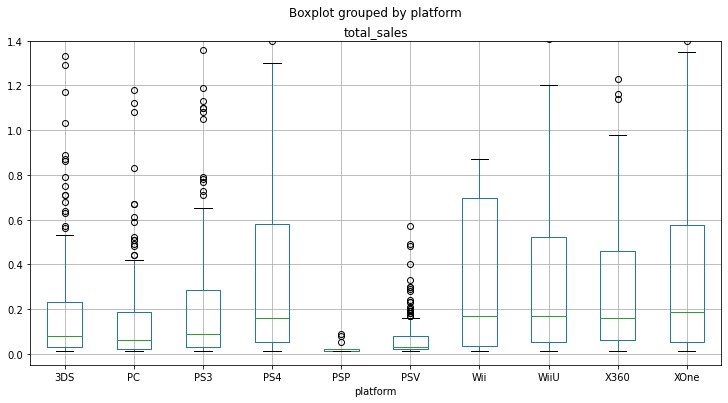

In [60]:
data_21.boxplot(column='total_sales', by='platform', figsize=(12, 6))
plt.ylim(-0.05, 1.4)
plt.show()

У всех платформ медиана находится в промежутке от 0 до 0.2, однако 75%-квантили сильно различаются. Продажи PSP и PSV все еще очень малы.

In [61]:
platform_21_pivot.index

Index(['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU', 'PC', 'PSV', 'Wii', 'PSP'], dtype='object', name='platform')

На диаграмме виден лишь 1 выброс - это продажи платформы PS4 с продажами 243.67 млн. Медиана находится на уровне чуть ниже 50 млн. 

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Возьмем срез `data_PS4` датафрейма где платформа это PS4 и проверим как на продажи влияют оценки критиков и пользователей. 

In [62]:
data_PS4 = data_21.query('platform == "PS4"')

In [63]:
# Корреляция между общими продажами и оценкой критиков

data_PS4['total_sales'].corr(data_PS4['critic_score'])

0.4021203477635433

In [64]:
# Корреляция между общими продажами и оценкой пользователей

data_PS4['total_sales'].corr(data_PS4['user_score'])

-0.039364345213287334

Корреляция между общими продажами и оценками каждой категории различается. Общие продажи достаточно сильно зависят от оценок критиков, вероятно на профессиональое мнение больше опираются при покупке, а вот на мнение пользователей либо не смотрят совсем либо принимают обратное мнение (в очень редких случаях). Критики обычно оченивают новые товары по определенным критериям и имеют более независимые мнения, а пользователи опираются на свои эмоции при оценивании, например в игре может быть замечательная графика, но какой-то ее этап раздражает пользователя тем, что он не может его пройти и ставит на эмоциях плохую оценку.

Построим диаграмму рассеяния.

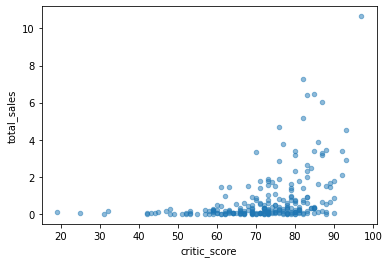

In [65]:
# Диаграмма рассеяния между общими продажами и оценкой критиков

data_PS4.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5)
plt.show()

Диаграмма поддтверждает что связь между продажами и оценкой критиков есть и относительно сильная. При самых высоких оценках (от 70) пользователи больше обращают внимания на оценки критиков, тем не менее немало и тех, кто не обращает на них внимания.

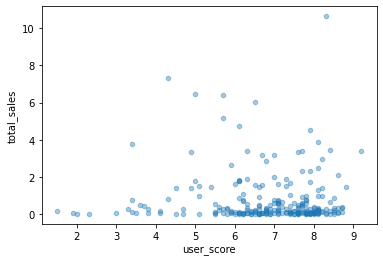

In [66]:
# Диаграмма рассеяния между общими продажами и оценкой пользователей

data_PS4.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.4)
plt.show()

Связи между оценкой пользователей и продажами нет, есть отдельные пользователи, которые на это смотрят, но все же почти никто не опирается на мнение других пользователей.

Мы рассмотрели зависимость продаж игр от отзывов пользователей и критиков на примере платформы PS4 - самой продаваемой на данный момент. Выяснилось, что зависимость между продажами и оценкой критиков есть, особенно при очень хороших отзывах. А вот между продажами и оценкой пользователей даже отрицательная, хотя и стремится к 0. 

### Соотнесите выводы с продажами игр на других платформах.

Можно сделать вывод, что скорее всего та же зависимость будет видна и на других платформах. У каждого пользователя свой вкус на который он опирается больше чем на мнение других пользователей, но все таки более менее доверяет критикам. Это похоже на то как мы выбираем фильмы: несмотря на реакции и оценки, конкретному человеку может фильм очень понравится, вызывая нужные ему эмоции. 

Построим матрицу корреляции по данным актуального периода.

In [67]:
data_21.corr().style.background_gradient(cmap='BrBG')

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.122977,-0.093408,-0.056134,-0.096834,0.071818,0.013853,-0.119305
na_sales,-0.122977,1.000000,0.735920,0.264362,0.841484,0.333306,-0.028258,0.914284
eu_sales,-0.093408,0.735920,1.000000,0.188675,0.930140,0.270826,-0.040985,0.902889
jp_sales,-0.056134,0.264362,0.188675,1.000000,0.170780,0.130316,0.184141,0.451444
other_sales,-0.096834,0.841484,0.930140,0.170780,1.000000,0.289985,-0.030056,0.914454
critic_score,0.071818,0.333306,0.270826,0.130316,0.289985,1.000000,0.504460,0.331425
user_score,0.013853,-0.028258,-0.040985,0.184141,-0.030056,0.504460,1.000000,-0.010211
total_sales,-0.119305,0.914284,0.902889,0.451444,0.914454,0.331425,-0.010211,1.000000


Обратим внимание на пересечение сторок `critic_score`, `user_score` и столбца `total_sales`. Корреляция между общими продажами и оценкой критиков также выражена слабо, а между общими продажами и оценкой пользователй ее нет, как и при исследовании корреляций для одной платформы.

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Рассмотрим жанры игр, какие жанры наиболее частые, а какие не так популярны.

In [68]:
data_21['genre'].value_counts()

Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: genre, dtype: int64

Также построим сводную таблицу `data_genre` по жанрам и медианой общих продаж по каждому и отсортируем ее.

In [69]:
data_genre = data_21.pivot_table(index='genre', values='total_sales', aggfunc='median'
                   ).sort_values(by='total_sales', ascending=False)

In [70]:
data_genre

,total_sales
genre,
Shooter,0.475
Sports,0.170
Fighting,0.115
Platform,0.115
Role-Playing,0.100
Simulation,0.095
Misc,0.090
Action,0.080
Racing,0.080


Для наглядности построим столбчатую диаграмму.

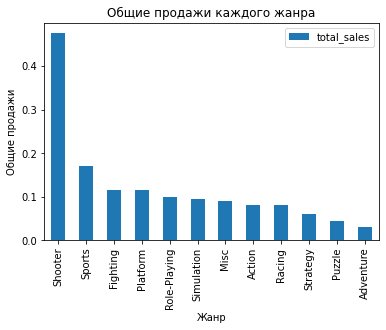

In [71]:
data_genre.plot(kind='bar', title='Общие продажи каждого жанра', xlabel='Жанр', ylabel='Общие продажи')
plt.show()

Наиболее популярные жанры это Shooter. Самые популярные игры это динамичные, должно быть много различных действий, функция и интересная графика. На втором месте стоит Sports, чья медиана по продажам почти в три раза меньше чем у Shooter. А вот Puzzle, Strategy и Adventure наименее популярны, вероятно они довольно однообразные и скучные.

## Шаг 4. Составьте портрет пользователя каждого региона

Чтобы составить портрет пользователя каждого региона (NA, EU, JP) найдем следующие значения:
- топ-5 платформ;
- топ-5 жанров;
- проверим влияет ли рейтинг ESRB на продажи в каждом регионе.

### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

Для каждого из трех регионов составим сводную таблицу с информацией о локальных продажах каждой из топ-5 платформ, общими продажами платформ и долей локальных продаж от общих.

In [72]:
# Создаем отсортированную сводную таблицу dt_21_na с топ-5 платформами по Северной Америке

dt_21_na = data_21.pivot_table(index='platform', 
                               values=['na_sales', 'total_sales'], 
                               aggfunc='sum'
                              ).sort_values(by='na_sales', ascending=False).head().reset_index()

# Добавляем столбец с долями

dt_21_na['share'] = dt_21_na['na_sales'] / dt_21_na['total_sales']

In [73]:
# Вывод сводной таблицы

dt_21_na

,platform,na_sales,total_sales,share
0,PS4,98.61,243.67,0.404687
1,XOne,81.27,127.84,0.635717
2,X360,28.30,43.87,0.645088
3,3DS,22.64,83.00,0.272771
4,PS3,22.05,58.81,0.374936


Таблица отсортирована по столбцу `na_sales`, самая популярная платформа для покупки игр в Северной Америке это PS4. Посмотрим на доли продаж в регионе относительно общих продаж. Для этого построим столбчатую диаграмму.

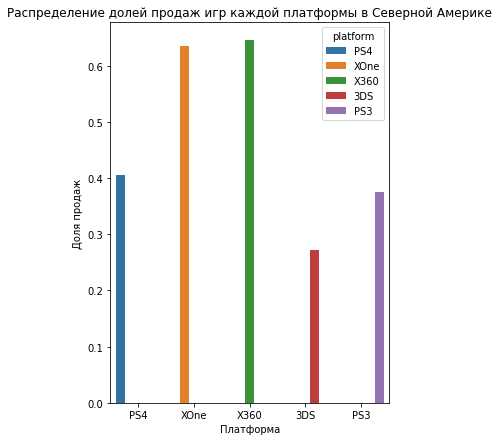

In [74]:
# Строим столбчатую диаграмму с информацией полученной в сводной таблице

plt.figure(figsize=(5, 7))

ax = sns.barplot(data=dt_21_na, x='platform', y='share', hue='platform')
ax.set_title('Распределение долей продаж игр каждой платформы в Северной Америке')
ax.set(xlabel='Платформа', ylabel='Доля продаж');

plt.show()

Х360 лидирует по проценту от всех продаваемых в мире игр на этой платформе - почти 65% продаж приходится на Северную Америку. На втором месте по продажам в регионе и по проценту продаж от общего по миру стоит XOne - более 63%, на третьем, четвертом и пятом стоят PS4, PS3 и 3DS соответственно.

In [75]:
# Создаем отсортированную сводную таблицу dt_21_eu с топ-5 платформами по Европе

dt_21_eu = data_21.pivot_table(index='platform', 
                               values=['eu_sales', 'total_sales'], 
                               aggfunc='sum'
                              ).sort_values(by='eu_sales', ascending=False).head().reset_index()

# Добавляем столбец с долями

dt_21_eu['share'] = dt_21_eu['eu_sales'] / dt_21_eu['total_sales']

In [76]:
# Вывод сводной таблицы

dt_21_eu

,platform,eu_sales,total_sales,share
0,PS4,130.04,243.67,0.533673
1,XOne,46.25,127.84,0.361780
2,PS3,25.54,58.81,0.434280
3,PC,17.97,25.20,0.713095
4,3DS,16.12,83.00,0.194217


В Европе также как и в Северной Америке, по продажам лидирует PS4, и XOne занимает второе место. Также пояаляется платформа PC, а Х360 в топ-5 по этому региону не входит.

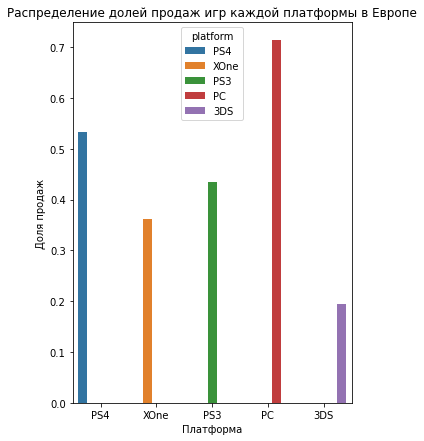

In [77]:
# Строим столбчатую диаграмму с информацией полученной в сводной таблице

plt.figure(figsize=(5, 7))

ax = sns.barplot(data=dt_21_eu, x='platform', y='share', hue='platform')
ax.set_title('Распределение долей продаж игр каждой платформы в Европе')
ax.set(xlabel='Платформа', ylabel='Доля продаж');

plt.show()

Продажи игр на платформе PС в Европе занимают более 70%. PS4 занимает больший процент чем в Америке от общих продаж по миру - более 50%. Меньше всего процентов и по продажам в регионе и по доли продаваемых игр от общих продаж занимает платформа 3DS - менее 20%.

In [78]:
# Создаем отсортированную сводную таблицу dt_21_jp с топ-5 платформами по Японии

dt_21_jp = data_21.pivot_table(index='platform', 
                               values=['jp_sales', 'total_sales'], 
                               aggfunc='sum'
                              ).sort_values(by='jp_sales', ascending=False).head().reset_index()

# Добавляем столбец с долями

dt_21_jp['share'] = dt_21_jp['jp_sales'] / dt_21_jp['total_sales']

In [79]:
# Вывод сводной таблицы

dt_21_jp

,platform,jp_sales,total_sales,share
0,3DS,44.24,83.00,0.533012
1,PS4,15.02,243.67,0.061641
2,PSV,14.54,20.59,0.706168
3,PS3,11.22,58.81,0.190784
4,WiiU,7.31,39.82,0.183576


Данные сводной таблицы по Японии заметно отличаются от Европы и Северной Америки. Наиболее популярная платформа тут - это 3DS, когда в остальных регионах она стоит на 4 и 5 месте в топ-5. Также присутсвуют новые платформы - PSV, WiiU, и нет таких платформ как XOne, X360 и PC, которые есть в рассмотреных выше регионах. Можно предположить, что из-за отдаленности от Америки и Европы, а также внутренней, сильно отличающейся, культуры страны, пользователи заинтересованы немного в другой графике, темах компьютерных игр, а также имеют влияние соседних стран - Китая и Кореи.

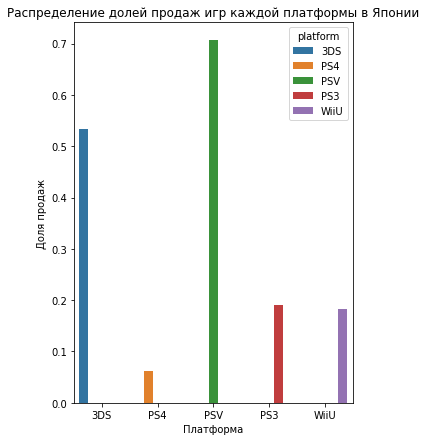

In [80]:
# Строим столбчатую диаграмму с информацией полученной в сводной таблице

plt.figure(figsize=(5, 7))

ax = sns.barplot(data=dt_21_jp, x='platform', y='share', hue='platform')
ax.set_title('Распределение долей продаж игр каждой платформы в Японии')
ax.set(xlabel='Платформа', ylabel='Доля продаж');


plt.show()

Скорее всего, так как PSV входит в топ-5 платформ только в Японии, именно в этом региона продают более 70% всех игр выпущенных на ней. Также большой процент от общих продаж имеет 3DS - 53%. Остальные не превышают 20% продаж, а PS4, наиболее популярная в Европе и Америке имеет лишь 6% от общих продаж.

### Самые популярные жанры (топ-5). Поясните разницу.

Теперь посмотрим самые популярные топ-5 жанров по каждому региону. Построим три столбчатые диаграммы с информацией о жанре и продажах для каждого из регионов.

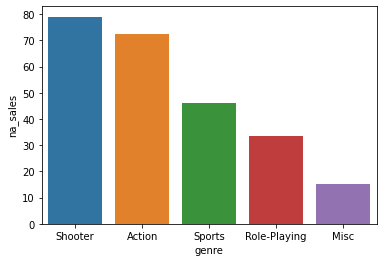

In [81]:
# Создаем столбчатую диаграмму по отсортированной сводной таблице (data_21.pivot_table())
# с топ-5 жфнрами по Северной Америке

sns.barplot(data = data_21.pivot_table(index='genre', 
                    values='na_sales', 
                    aggfunc='sum'
                   ).sort_values(by='na_sales', ascending=False).head().reset_index(), x='genre', y='na_sales')
plt.show()

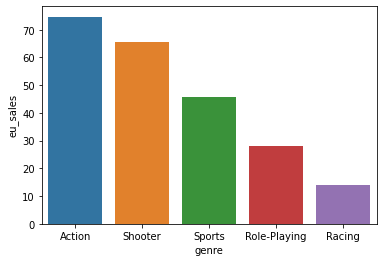

In [82]:
# Создаем столбчатую диаграмму по отсортированной сводной таблице (data_21.pivot_table())
# с топ-5 жфнрами по Европе

sns.barplot(data = data_21.pivot_table(index='genre', 
                    values='eu_sales', 
                    aggfunc='sum'
                   ).sort_values(by='eu_sales', ascending=False).head().reset_index(), x='genre', y='eu_sales')
plt.show()

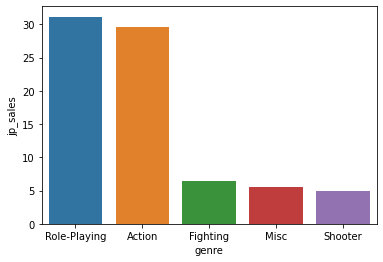

In [83]:
# Создаем столбчатую диаграмму по отсортированной сводной таблице (data_21.pivot_table())
# с топ-5 жфнрами по Японии

sns.barplot(data = data_21.pivot_table(index='genre', 
                    values='jp_sales', 
                    aggfunc='sum'
                   ).sort_values(by='jp_sales', ascending=False).head().reset_index(), x='genre', y='jp_sales')
plt.show()

В каждом регионе набор и популярность жанров различается. В Америке самый продаваемый жанр это Shooter, тогда как в Японии этот жанр стоит на 5 месте, а в Европе стоит на втором месте. Первое место там занимает жанр Action, в Амрике и в Японии он занимает наоборот второе место. Самый популярны жанр в Японии - Role-Playing, также присутсвует жанр Fighting, которого нет ни в америке, ни в Европе. Топ-5 жанров в Америке и Европе относительно похажи, различаются продажами одинаковых жанров и самым последним - Misc (Америка)/Racing (Европа). Набор топ-5 Японии сильнее отличается от двух других регионов, скорее всего из-за сильных различий культур, а также там более отрицательно относятся к играм со стрельбой в целях сохранения психического здоровья.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Проверим влияет ли рейтинг ESRB  на продажи в каждом регионе. \
Рейтинг  ESRB:
- «EC» — «Для детей младшего возраста»
- «E» — «Для всех»
- «E10+» — «Для всех от 10 лет и старше»
- «T» — «Подросткам»
- «M» — «Для взрослых»
- «AO» — «Только для взрослых»
- «RP» — «Рейтинг ожидается»

In [84]:
# Создаем сводную таблицу по рейтингу, сумме продаж по каждому региону,
# общей сумме по миру, а также долях, которые занимает продаваемый рейтинг по каждому региону

dt_21_rating = data_21.pivot_table(index='rating', 
                    values=['na_sales', 'eu_sales', 'jp_sales'], 
                    aggfunc='sum'
                   ).reset_index()

In [85]:
# Выводим сводную таблицу

dt_21_rating

,rating,eu_sales,jp_sales,na_sales
0,E,58.06,8.94,50.74
1,E10+,26.16,4.46,33.23
2,M,93.44,8.01,96.42
3,RP,58.95,56.90,64.72
4,T,34.07,14.78,38.95


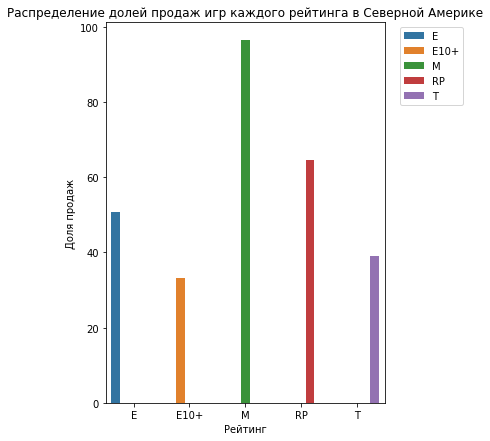

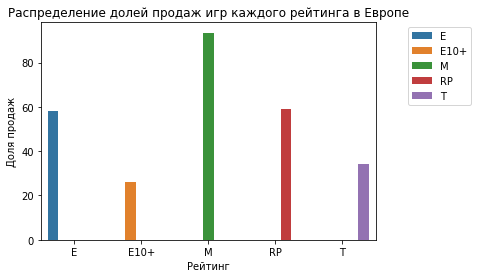

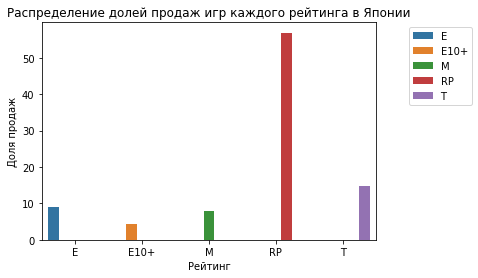

In [86]:
# Строим три столбчатые диаграммы с информацией от рейтинге и доли продаваемых игр данного 
# рейтинга по каждому региону

plt.figure(figsize=(5, 7))

nax = sns.barplot(data=dt_21_rating, x='rating', y='na_sales', hue='rating') # строим диаграмму по NA
nax.set_title('Распределение долей продаж игр каждого рейтинга в Северной Америке') # даем название диаграмме
nax.set(xlabel='Рейтинг', ylabel='Доля продаж'); # даем название осям
plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right') # перемещаем легенду в правый верхний угол за график
plt.show()

euax = sns.barplot(data=dt_21_rating, x='rating', y='eu_sales', hue='rating') # строим диаграмму по EU
euax.set_title('Распределение долей продаж игр каждого рейтинга в Европе') # даем название диаграмме
euax.set(xlabel='Рейтинг', ylabel='Доля продаж'); # даем название осям
plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right') # перемещаем легенду в правый верхний угол за график
plt.show()

jpax = sns.barplot(data=dt_21_rating, x='rating', y='jp_sales', hue='rating') # строим диаграмму по JP
jpax.set_title('Распределение долей продаж игр каждого рейтинга в Японии') # даем название диаграмме
jpax.set(xlabel='Рейтинг', ylabel='Доля продаж'); # даем название осям
plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right') # перемещаем легенду в правый верхний угол за график
plt.show()

Диаграммы Америки и Европы не раздичаются, в Японии есть небольшое отличие, и можно сказать что рейтинг игры влияет на продажи. Чаще всего в Европе и Америке покупают игры рейтинг M, то есть "Для взрослых", на втором месте во всех трех регионах стоит RP — "Рейтинг ожидается", далее идут E — "Для всех", Т - "Подросткам" и E10+ — "Для всех от 10 лет и старше" . В Японии немного другая картина: самый популярный рейтинг RP, причем он сильно выделяется на фоне остальных рейтингов. На втором месте Т - "Подросткам", в двух других регионах он четвертый. Игры с рейтингом Е - в Японии стоят на третьем месте, а М на четвертом. Детям от 10 лет - Е10+ - не так часто покупают компьютерные игры во всех трех регионах. Также АО и ЕС во всех трех регионах не покупают.

В результате исследования можно составить такой портрет пользователя по каждому региону.
- Северная Америка (NA):
       Пользователи предпочитают компьютерные игры на платформах PS4, XOne, X360, 3DS, PS3, одного из жанров Shooter, Action, Sports, Role-Playing, Misc с рейтингом М, RP, Е, T, Е10+. Наиболее вероятно что пользователь захочет купить игру на платформе PS4, жанра Shooter рейтинга М.
- Европа (EU):
        Европейские пользователи похожи на пользователей из Северной Америки. Они предпочитают PS4, XOne, PS3, PC, 3DS, жанров: Action, Shooter, Sports, Role-Playing, Racing, рейтингов - М, RP, Е, T, Е10+. И наиболее вероятная покупка у европейского пользователя - это игра на платформе PS4, жанра Action, рейтинга М. То есть отличается лишь более предпочтительный жанр.
- Япония (JP):
        Этот региона сильнее отличется от предыдущих двух, вероятно из-за культурных различий, а также занятости взрослого поколения. Самые популярные платформы - 3DS, PS4, PSV, PS3, WiiU, жанры - Role-Playing, Action, Fighting, Misc, Shooter, жанров RP, Т, Е, М, Е10+. Самый популяр-ный выбор платформы 3DS, жанра Role-Playing с рейтингом RP.

## Шаг 5. Проверьте гипотезы

Проверим две гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую и альтернативную гипотезу для первого пункта: \
Н0 - средний пользовательский рейтинг платформы Xbox One = среднему пользовательскому рейнигу РС \
Н1 - средний пользовательский рейтинг платформы Xbox One != среднему пользовательскому рейнигу РС

In [87]:
# создаем датасет с значениями пользовательского рейтинга по Xbox One, убираем NaN

dt_xone = data_21.query('platform == "XOne"')['user_score'].dropna()

In [88]:
# создаем датасет с значениями пользовательского рейтинга по РС, убираем NaN

dt_pc = data_21.query('platform == "PC"')['user_score'].dropna()

In [89]:
# критический уровень статистической значимости, если p-value окажется меньше него - отвергнем гипотезу

alpha = .05

results = st.ttest_ind(dt_xone, dt_pc, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Проверили двустороннюю гипотузу. Нулевую гипотеза отвергнуть не поулилось, следовательно два показателя средних пользовательких рейтингов платформ  Xbox One и PC не противоречат нашей нулевой гипотезе.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Теперь составим нулевую и альтернативну гипотезы для второго пункта: \
Н0 - средний пользовательский рейтинг жанра Action = среднему пользовательскому рейтингу жанра Sports\
Н1 - средний пользовательский рейтинг жанра Action != среднему пользовательскому рейтингу жанра Sports

In [90]:
# создаем датасет с значениями пользовательского рейтинга по Action, убираем NaN

dt_action = data_21.query('genre == "Action"')['user_score'].dropna()

In [91]:
# создаем датасет с значениями пользовательского рейтинга по Sports, убираем NaN

dt_sports = data_21.query('genre == "Sports"')['user_score'].dropna()

In [92]:
# критический уровень статистической значимости, если p-value окажется меньше него - отвергнем гипотезу

alpha = .05

results = st.ttest_ind(dt_action, dt_sports, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Здесь также была проверена двусторонняя гипотеза, о том что средние пользователские рейтинги по двум жанрам Action и Sports разные. Так как нулевую гипотезу получилось отвергнуть, следовательно данные противоречат выдвинутой гипотезе.

## Шаг 6. Напишите общий вывод

Данный анализ был проведем с целью выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. \
Были выявлены следующие особенности:
- все платформы имеют срок жизни примерно 9-10 лет, далее их продажи быстро идут на спад:
        Была построена столбчатая диаграмма, содержащая информацию о распределении общих продаж компьютерных игр топ-10 платформами по годам. 
- было проведено исследование о том, как оценки критиков и пользователей влияют на продажи:
        Корреляция между общими продажами и оценками критиков показала, что связь между значениями достаточно сильная, а у продаж и оценкой пользователй ее почти нет. Также диаграмма рассеяния показала что связь больше при хороших оценках - от 70 у критиков.
- составлен портрет наиболее частого пользователя:
        Были построены различные гистограмы, которые показали что для Северной Америки это покупка игры на платформе PS4 жанра Shooter рейтинга М, для Европы все кроме жанра - Action - такое же, а для Японии ничего не сходится с двумя предыдущими регионами, платформа 3DS, жанр Role-Playing с рейтингом RP.
- были проверены две гипотезы:
        Выяснилось, что средние пользовательские рейтинги платформ Xbox One и PC вполне могут быть равными, либо находится близко друг другу; средние пользовательские рейтинги жанров Action и Sports не разные.

Из проведенного исследования можно сдлеалть вывод, что стоит обратить внимания на платформы: PS4, PS3, 3DS (пересечение топ-5 платформ по трем регионам). Если смотреть по регионам, то в Северной Америке следует также обратить внимние на платформы  XOne и X360, в Европе на XOne и РС, в Японии - PSV и WiiU. Также стоит обратить внимание на жанры:   Action, Shooter, Role-Playing, (пересечние топ-5 жанров по регионам), также можно отметить Sports (Америка, Европа),  Misc (Америка, Япония), Racing (Европа) и Fighting (Япония) и рейтинг: RP, Е, М, Т, Е10+ во всех регионах. Если нет возможности брать для каждого региона платформы отдельно, то скорее всего выигрышным вариантом будет PS4, которая стоит на первом месте в Америке и Европе и на втором в Японии, также она относительно новая и ее срок жизни в топе рейтинга не должен закончится еще несколько лет.